<a href="https://colab.research.google.com/github/oburckard/PFE/blob/master/PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

t=: 0.0


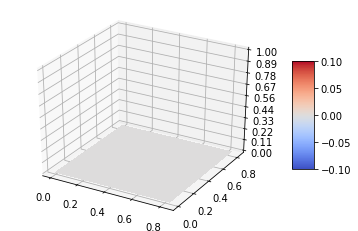

t=: 0.5


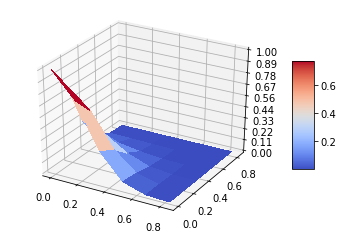

t=: 1.0


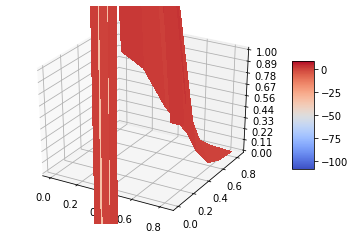

t=: 1.5


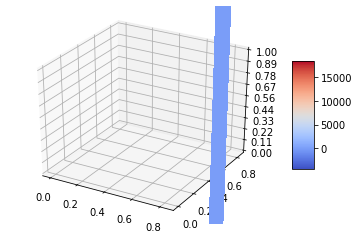

t=: 2.0


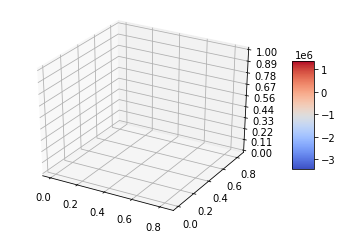

t=: 2.5


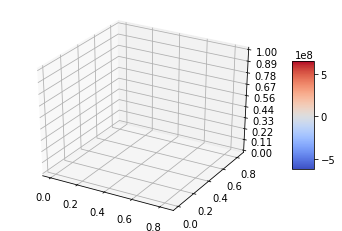

t=: 3.0


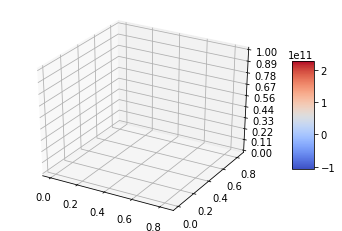

t=: 3.5


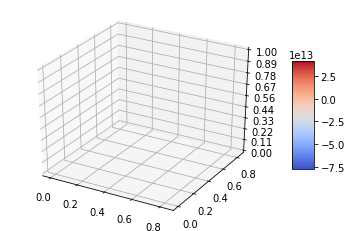

t=: 4.0


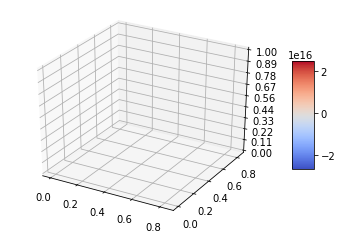

t=: 4.5


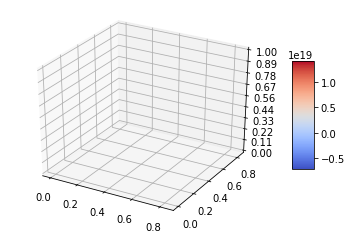

t=: 5.0


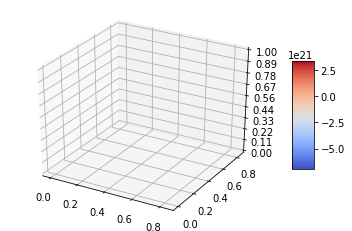

t=: 5.5


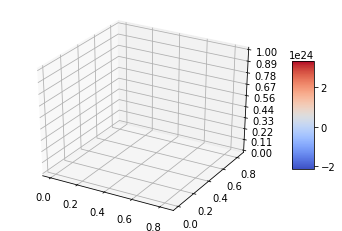

t=: 6.0


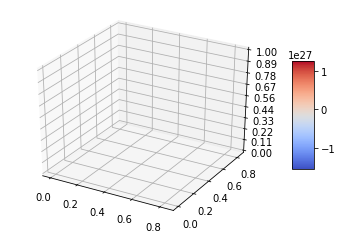

t=: 6.5


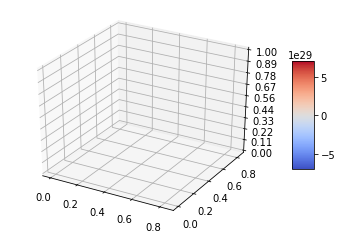

t=: 7.0


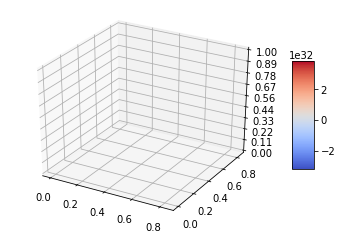

t=: 7.5


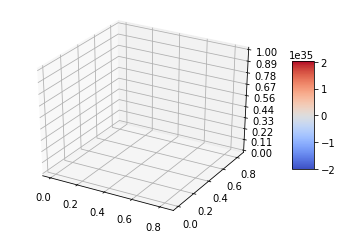

t=: 8.0


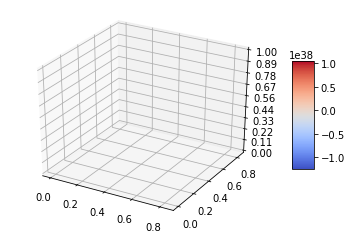

t=: 8.5


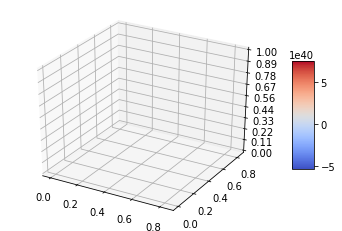

t=: 9.0


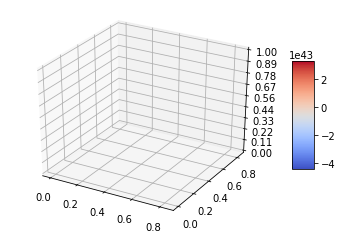

t=: 9.5


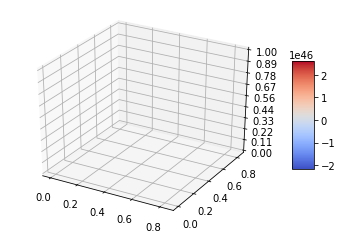

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Constantes
N = 5
g = 9.8 #gravité, 9,8m/s


# Valeurs des pas
dt = 0.5 # on prend l'intervalle entre 2 temps à 0.5 sec
dx = 1/(N+1) 
dy = 1/(N+1)
dt2 = dt*dt
dx2 = dx*dx
dy2 = dy*dy
dt2_dx2 = dt2/dx2
dt2_dy2 = dt2/dy2

xi = np.arange(0, 1, dx) 
yj = np.arange(0, 1, dy)
t = np.arange(0, 10, dt)

#Initialisation des matrices
Mat1 = np.zeros((N+1,N+1))
Mat2 = np.zeros((N+1,N+1))
F = np.zeros((N+1,N+1,10))
F_nm1 = np.zeros((N+1,N+1))
F_n = np.zeros((N+1,N+1))

#définition de la topographie
def h(xi,yj): #on prend une profondeur valant 1 partout
  return 1
 

#définition des différentes composantes des matrices
def A(xi,yj):
  return 2*(1-g*h(xi,yj)*(dt2_dx2+dt2_dy2))

def B(xi,yj,xip1,xim1): 
  return g*h(xi,yj)*dt2_dx2+g*0.25*dt2_dy2*(h(xip1,yj)-h(xim1,yj))

def C(xi,yj,xip1,xim1):
  return g*h(xi,yj)*dt2_dx2-g*0.25*dt2_dy2*(h(xip1,yj)-h(xim1,yj))

def D(xi,yj,yjp1,yjm1):
  return g*h(xi,yj)*dt2_dx2+g*0.25*dt2_dy2*(h(xi,yjp1)-h(xi,yjm1))

def E(xi,yj,yjp1,yjm1):
  return g*h(xi,yj)*dt2_dx2-g*0.25*dt2_dy2*(h(xi,yjp1)-h(xi,yjm1))

#Fonction source aux 2 premiers temps
for tp in range(0,2):
  for i in range(0,N+1):
    for j in range(0,N+1):
      F[i,j,tp]=np.exp(-10*(xi[i]**2+yj[j]**2))*np.sin(np.pi*t[tp])

for i in range(0,N+1):
  for j in range(0,N+1):      
    F_nm1[i,j]=F[i,j,0] #positions à l'instant n-1
    F_n[i,j]=F[i,j,1] #positions à l'instant n

#Remplissage des matrices
for i in range(0,N+1):
  Mat1[i,i]=A(xi[i],yj[i])

for i in range(0,N):
  Mat1[i,i+1]=B(xi[i],yj[i],xi[i+1],xi[i-1])
  Mat1[i+1,i]=C(xi[i],yj[i],xi[i+1],xi[i-1])
  Mat2[i,i+1]=E(xi[i],yj[i],yj[i+1],yj[i-1])
  Mat2[i+1,i]=D(xi[i],yj[i],yj[i+1],yj[i-1])


#Représentation graphique
for tp in t:
  fig = plt.figure()
  ax = fig.gca(projection='3d')

  # Pour afficher la surface
  X, Y = np.meshgrid(xi, yj)
  surf = ax.plot_surface(X, Y, F_nm1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

  # Pour "choisir" les valeurs de l'axe des z affichées
  ax.set_zlim(0, 1)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

  # Légende des couleurs avec leurs valeurs
  fig.colorbar(surf, shrink=0.5, aspect=5)
  print('t=:',tp)
  plt.show()

  #Pour déterminer la position à l'instant suivant
  F_np1 = -F_nm1+np.dot(Mat1,F_n)+np.dot(F_n,Mat2)
  F_nm1 = F_n
  F_n = F_np1